## Function read data

In [1]:
import pandas as pd

def read_data(sheet_names):
    df = []
    for name in sheet_names:
        cur_df = pd.read_excel("./Du lieu mo hinh.xlsx", sheet_name=name)

        df.append(cur_df)
    return pd.concat(df, axis=0)

In [2]:
df = read_data(["F and B"])
name = "F and B"
print(len(df))
df.head(10)


256


,Industry,Company,Year,EV,MC,PB,TQ,Leverage,Quality,Size,ROA,Growth,Tangibility,Liquidity,GDP,Inflation
0,1.0,AAM,2012,169.858761,214.268571,0.839,0.750,0.106523,0.039746,5.655155,6.24,-0.133997,0.215302,8.20,0.0525,0.0910
1,NaN,AAM,2013,93.579410,141.086915,0.546,0.467,0.144940,0.029097,5.710664,3.62,0.057079,0.221977,5.78,0.0542,0.0660
2,NaN,AAM,2014,86.109460,143.074049,0.556,0.481,0.134077,0.023266,5.694375,3.94,-0.016157,0.212615,6.37,0.0598,0.0409
3,NaN,AAM,2015,50.630992,103.331259,0.414,0.321,0.224520,-0.004571,5.774346,0.96,0.083255,0.159668,3.91,0.0668,0.0063
4,NaN,AAM,2016,50.993721,94.587848,0.386,0.367,0.050117,-0.007580,5.552587,0.74,-0.198892,0.179179,21.51,0.0621,0.0267
5,NaN,AAM,2017,12.730445,102.834476,0.427,0.409,0.042151,-0.013096,5.527684,0.47,-0.024595,0.219669,26.04,0.0681,0.0352
6,NaN,AAM,2018,24.320056,107.678362,0.509,0.468,0.079492,0.014768,5.437901,5.18,-0.085870,0.194065,12.16,0.0708,0.0354
7,NaN,AAM,2019,82.447117,133.775130,0.633,0.588,0.070734,0.009262,5.427185,4.51,-0.010659,0.183725,12.37,0.0702,0.0280
8,NaN,ABT,2012,303.132354,467.806298,1.217,0.906,0.255029,0.187460,6.246365,16.68,0.079531,0.162216,3.29,0.0525,0.0910
9,NaN,ABT,2013,265.063988,466.041883,1.123,0.677,0.397309,0.115508,6.534180,12.56,0.333511,0.134549,2.18,0.0542,0.0660


## Descriptive Statistic

In [3]:
import pandas as pd
import scipy.stats as stats

def stats_summary(df):
    """Calculates the mean, max, min, skewness, kurtosis, and Jarque-Bera probability
    of each column in a pandas dataframe.
    """
    summary = pd.DataFrame()
    for col in ['EV', 'MC', 'PB', 'TQ', 'Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity', 'Inflation']:
        data = df[col]
        mean = data.mean()
        max_ = data.max()
        min_ = data.min()
        stdev = data.std()
        skewness = data.skew()
        kurtosis = data.kurtosis()
        jb_prob = stats.jarque_bera(data)[1]
        summary[col] = [mean, max_, min_, stdev, skewness, kurtosis, jb_prob]
    summary.index = ['mean', 'max', 'min', 'stdev', 'skewness', 'kurtosis', 'Jarque-Bera Prob.']
    return summary

In [4]:
stats_summary(df)

,EV,MC,PB,TQ,Leverage,Quality,Size,ROA,Growth,Tangibility,Liquidity,Inflation
mean,8857.952017,8323.096112,1.594551,0.879559,0.477007,9.235396e-02,6.854307,9.581016,1.236414e-01,0.348061,2.165742,0.041188
max,291754.850037,302736.848844,12.681000,8.733000,0.966925,3.601776e-01,11.485526,99.380000,1.893912e+00,0.806443,26.040000,0.091000
min,-42.417888,10.119358,0.204000,0.038000,0.042151,-1.625783e-01,4.370209,-20.620000,-4.204496e-01,0.071336,0.550000,0.006300
stdev,33082.093755,33192.439203,1.589593,1.072418,0.216102,8.206895e-02,1.577333,10.754017,2.798320e-01,0.141346,2.548231,0.024459
skewness,5.279520,5.737698,3.121759,3.535073,0.127073,1.041431e+00,0.755955,2.791000,2.398241e+00,0.687539,6.079016,0.783705
kurtosis,31.983771,37.464209,13.350224,16.706842,-0.942874,1.680325e+00,0.193015,18.755884,9.146909e+00,0.572734,45.910675,-0.130108
Jarque-Bera Prob.,0.000000,0.000000,0.000000,0.000000,0.005901,9.072055e-17,0.000005,0.000000,9.330298e-239,0.000010,0.000000,0.000002


In [5]:
len(df)

256

In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


# fit a multiple linear regression model
# data_train = [df[df['Year'] < 2015], df[df['Year'] < 2016], df[df['Year'] < 2017], df[df['Year'] < 2018], df[df['Year'] < 2019]]
# data_test = [df[df['Year'] == 2015], df[df['Year'] == 2016], df[df['Year'] == 2017], df[df['Year'] == 2018], df[df['Year'] == 2019]]

# X_train = [data[['EVL', 'MC', 'PB', 'TQ', 'Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity', 'Inflation']] for data in data_train]
# y_train = [data['EV'] for data in data_train]

# X_test = [data[['EVL', 'MC', 'PB', 'TQ', 'Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity', 'Inflation']] for data in data_test]
# y_test = [data['EV'] for data in data_test]

# # create a MinMaxScaler object
data = df[['TQ', 'Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity']]
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(data), columns=['TQ', 'Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity'])

# Splitting the DataFrame into train and test sets
train_df, test_df = train_test_split(scaled_df, test_size=0.3, random_state=42)
X_train = train_df[['Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity']]
X_test = test_df[['Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity']]

y_train = train_df['TQ']
y_test = test_df['TQ']


In [7]:
X_train.head(10)
print(len(X_train))

179


In [8]:
data = {
    "LM": [],
    "Lasso": [],
    "GAM": [], 
    "RF": [],
    "GBM": [],
    "NNET": []
}

In [9]:
from sklearn.linear_model import LinearRegression

data['LM'] = []
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

sum_pred = 0
sum_avg = 0
for j in range(len(y_test)):
    sum_pred += (y_test.iloc[j] - y_pred[j])**2
    sum_avg += (y_test.iloc[j] - y_test.mean())**2

r_squared = (1 - sum_pred/sum_avg)
# Tính toán RMSE
rmse = sum_pred/len(X_test)

# print the model coefficients
# print('Intercept:', model.intercept_)
# print('Coefficients:', model.coef_)
data["LM"].append(round(r_squared*100, 4))
data["LM"].append(round(rmse, 7))
print('R-squared', r_squared)
print('RMSE', rmse)

coefficients = model.coef_
# Get the variable names
variable_names = ['Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity']

# Create a DataFrame of variable names and their corresponding coefficients
variable_importance = pd.DataFrame({'Variable': variable_names, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values
variable_importance = variable_importance.reindex(variable_importance['Coefficient'].abs().sort_values(ascending=True).index)

variable_importance['Coefficient'] = variable_importance['Coefficient'].abs()
variable_importance['Coefficient'] = round(variable_importance['Coefficient'] / variable_importance['Coefficient'].max() * 100, 2)

# Print the variable importance
print(variable_importance)


R-squared 0.5361663407433175
RMSE 0.009647569679867596
      Variable  Coefficient
4       Growth         1.40
6    Liquidity         3.90
5  Tangibility         5.18
3          ROA        14.13
0     Leverage        25.31
2         Size        26.33
1      Quality       100.00


/tmp/ipykernel_61237/381686342.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)


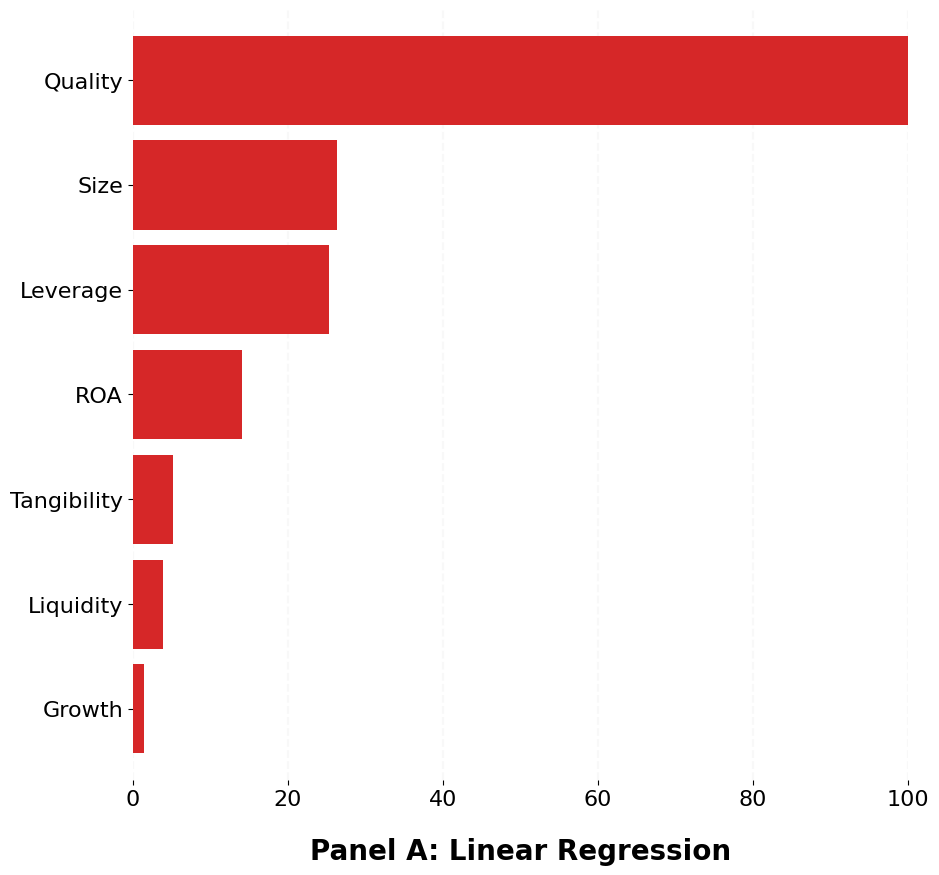

In [10]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

ax = variable_importance['Coefficient'].plot(kind='barh', figsize=(8, 10), color='#d62728', zorder=2, width=0.85)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
# ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Define the new y-tick labels
new_yticklabels = variable_importance['Variable'].values

# Set the new y-tick labels
ax.set_yticklabels(new_yticklabels, fontsize=16)
ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)
ax.set_xlim([0, 100])

# Set x-axis label
ax.set_xlabel("Panel A: Linear Regression", labelpad=20, weight='bold', size=20)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
plt.gcf().set_size_inches(10, 10)
plt.savefig(name + '_TQ_LM.png')

In [11]:
from sklearn.linear_model import Lasso

data['Lasso'] = []

model = Lasso(alpha=0.0001)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

sum_pred = 0
sum_avg = 0
for j in range(len(y_test)):
    sum_pred += (y_test.iloc[j] - y_pred[j])**2
    sum_avg += (y_test.iloc[j] - y_test.mean())**2

print(sum_pred)
print(sum_avg)

r_squared = (1 - sum_pred/sum_avg)
# Tính toán RMSE
rmse = sum_pred/len(X_test)

# print the model coefficients
# print('Intercept:', model.intercept_)
# print('Coefficients:', model.coef_)
data["Lasso"].append(round(r_squared*100, 4))
data["Lasso"].append(round(rmse, 7))
print('R-squared', r_squared)
print('RMSE', rmse)

coefficients = model.coef_
print(coefficients)
# Get the variable names
variable_names =  ['Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity']

# Create a DataFrame of variable names and their corresponding coefficients
variable_importance = pd.DataFrame({'Variable': variable_names, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values
variable_importance = variable_importance.reindex(variable_importance['Coefficient'].abs().sort_values(ascending=True).index)

variable_importance['Coefficient'] = variable_importance['Coefficient'].abs()
variable_importance['Coefficient'] = round(variable_importance['Coefficient'] / variable_importance['Coefficient'].max() * 100, 2)

# Print the variable importance
print(variable_importance)

0.745000545536435
1.6015717068491346
R-squared 0.5348316017631718
RMSE 0.009675331760213441
[-0.10774073  0.41478157  0.10591817  0.0444225   0.         -0.01839741
  0.00513657]
      Variable  Coefficient
4       Growth         0.00
6    Liquidity         1.24
5  Tangibility         4.44
3          ROA        10.71
2         Size        25.54
0     Leverage        25.98
1      Quality       100.00


/tmp/ipykernel_61237/3787277174.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)


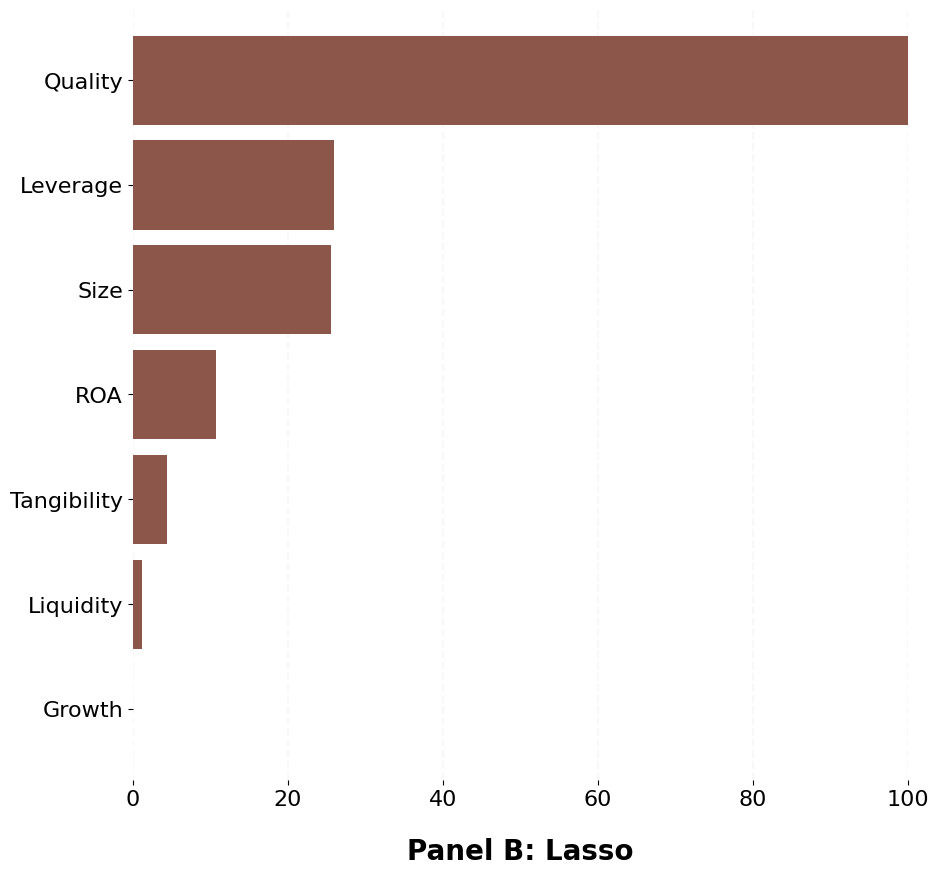

In [12]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

ax = variable_importance['Coefficient'].plot(kind='barh', figsize=(8, 10), color='#8c564b', zorder=2, width=0.85)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
# ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Define the new y-tick labels
new_yticklabels = variable_importance['Variable'].values

# Set the new y-tick labels
ax.set_yticklabels(new_yticklabels, fontsize=16)
ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)
ax.set_xlim([0, 100])

# Set x-axis label
ax.set_xlabel("Panel B: Lasso", labelpad=20, weight='bold', size=20)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
plt.gcf().set_size_inches(10, 10)
plt.savefig(name + '_TQ_Lasso.png')

In [13]:
from pygam import LinearGAM

data["GAM"] = []
gam = LinearGAM()
gam.fit(X_train, y_train)
y_pred = gam.predict(X_test)

sum_pred = 0
sum_avg = 0
for j in range(len(y_test)):
    sum_pred += (y_test.iloc[j] - y_pred[j])**2
    sum_avg += (y_test.iloc[j] - y_test.mean())**2

r_squared = (1 - sum_pred/sum_avg)
# Tính toán RMSE
rmse = sum_pred/len(X_test)

# print the model coefficients
#  # print('Intercept:', model.intercept_)
# print('Coefficients:', model.coef_)
data["GAM"].append(round(r_squared*100, 4))
data["GAM"].append(round(rmse, 7))
print('R-squared', r_squared)
print('RMSE', rmse)

 # compute variable importance
variable_names = ['Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity']
coefs = gam.coef_


# Create a DataFrame of variable names and their corresponding coefficients
variable_importance = pd.DataFrame({'Variable': variable_names, 'Coefficient': coefs[0:7]})

# Sort the DataFrame by absolute coefficient values
variable_importance = variable_importance.reindex(variable_importance['Coefficient'].abs().sort_values(ascending=True).index)

variable_importance['Coefficient'] = variable_importance['Coefficient'].abs()
variable_importance['Coefficient'] = round(variable_importance['Coefficient'] / variable_importance['Coefficient'].max() * 100, 2)

print(variable_importance)

R-squared 0.7636379466967126
RMSE 0.004916243859004054
      Variable  Coefficient
5  Tangibility        15.43
4       Growth        32.50
6    Liquidity        43.68
3          ROA        50.67
2         Size        57.73
1      Quality        77.08
0     Leverage       100.00


/tmp/ipykernel_61237/3332843440.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)


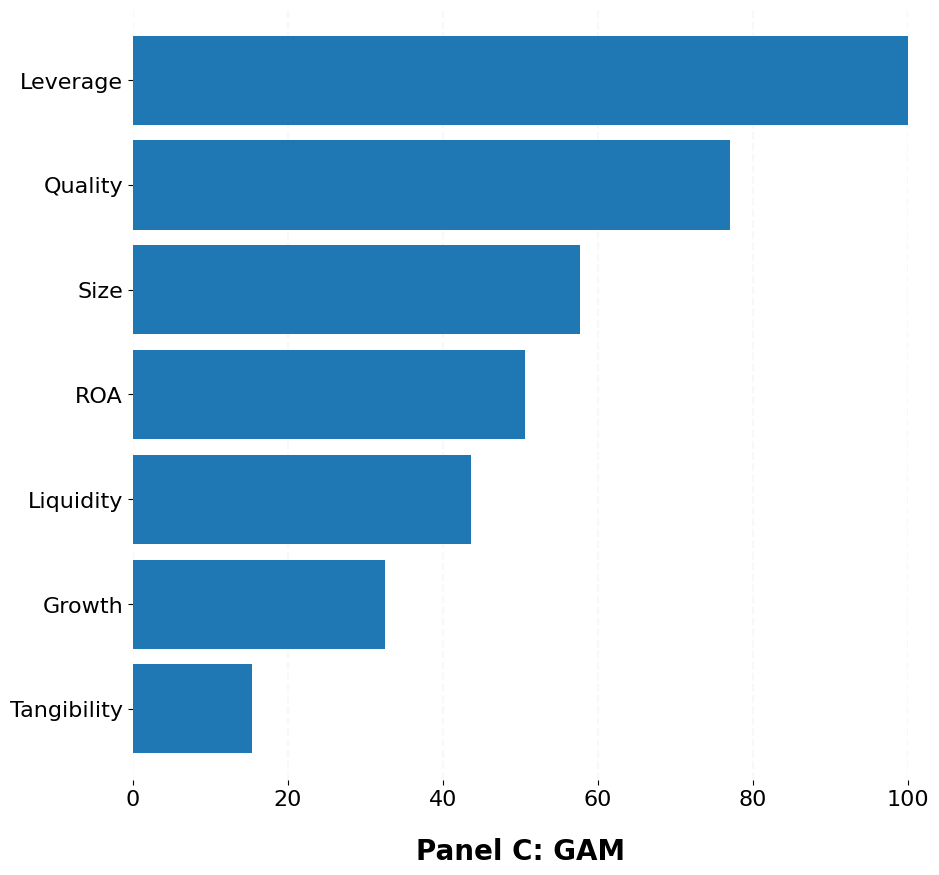

In [14]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

ax = variable_importance['Coefficient'].plot(kind='barh', figsize=(8, 10), color='#1f77b4', zorder=2, width=0.85)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
# ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Define the new y-tick labels
new_yticklabels = variable_importance['Variable'].values

# Set the new y-tick labels
ax.set_yticklabels(new_yticklabels, fontsize=16)
ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)
ax.set_xlim([0, 100])

# Set x-axis label
ax.set_xlabel("Panel C: GAM", labelpad=20, weight='bold', size=20)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
plt.gcf().set_size_inches(10, 10)
plt.savefig(name + '_TQ_GAM.png')

In [15]:
from sklearn.ensemble import RandomForestRegressor

data["RF"] = []
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

sum_pred = 0
sum_avg = 0
for j in range(len(y_test)):
    sum_pred += (y_test.iloc[j] - y_pred[j])**2
    sum_avg += (y_test.iloc[j] - y_test.mean())**2

r_squared = (1 - sum_pred/sum_avg)
# Tính toán RMSE
rmse = sum_pred/len(X_test)

# print the model coefficients
# print('Intercept:', model.intercept_)
# print('Coefficients:', model.coef_)
data["RF"].append(round(r_squared*100, 4))
data["RF"].append(round(rmse, 7))
print('R-squared', r_squared)
print('RMSE', rmse)

importances = model.feature_importances_

# create a dataframe of feature importances and sort by importance
variable_importance = pd.DataFrame({'Variable':  ['Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity'], 'Coefficient': importances})

# # Sort the DataFrame by absolute coefficient values
variable_importance = variable_importance.reindex(variable_importance['Coefficient'].abs().sort_values(ascending=True).index)

variable_importance['Coefficient'] = variable_importance['Coefficient'].abs()
variable_importance['Coefficient'] = round(variable_importance['Coefficient'] / variable_importance['Coefficient'].max() * 100, 2)

print(variable_importance)


R-squared 0.7020094889981272
RMSE 0.0061980931341573415
      Variable  Coefficient
4       Growth        10.80
0     Leverage        11.77
6    Liquidity        15.40
5  Tangibility        21.01
2         Size        31.99
1      Quality        77.02
3          ROA       100.00


/tmp/ipykernel_61237/180690932.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)


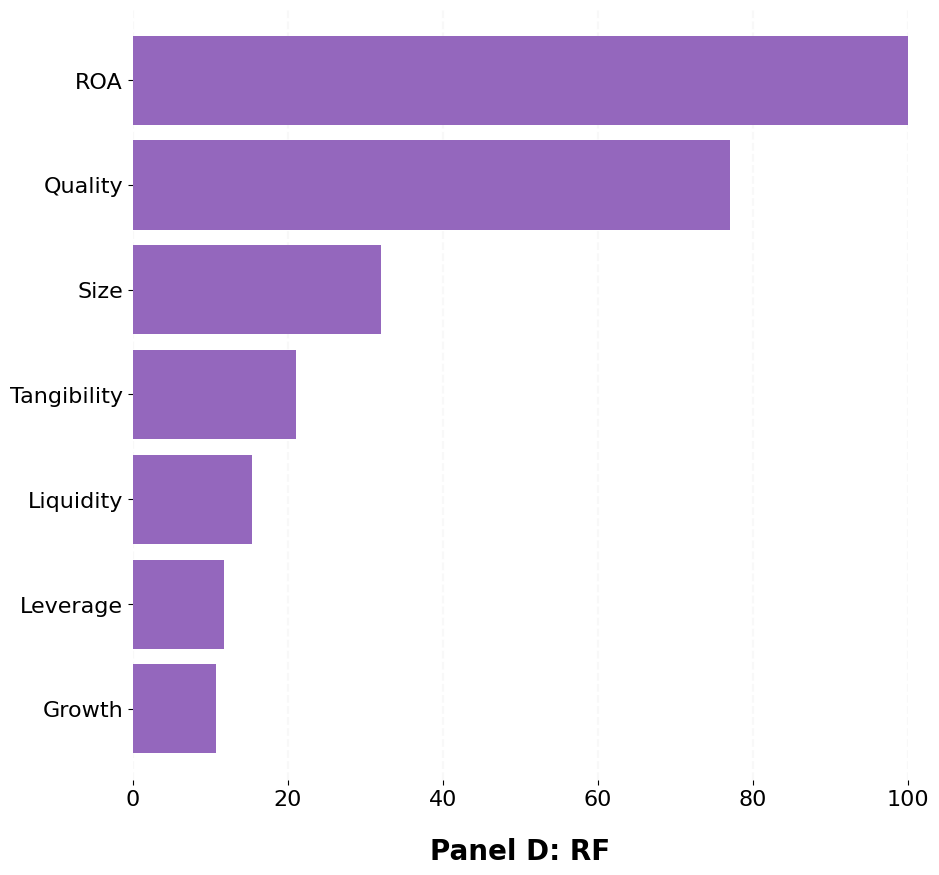

In [16]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

ax = variable_importance['Coefficient'].plot(kind='barh', figsize=(8, 10), color='#9467bd', zorder=2, width=0.85)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
# ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Define the new y-tick labels
new_yticklabels = variable_importance['Variable'].values

# Set the new y-tick labels
ax.set_yticklabels(new_yticklabels, fontsize=16)
ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)
ax.set_xlim([0, 100])

# Set x-axis label
ax.set_xlabel("Panel D: RF", labelpad=20, weight='bold', size=20)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
plt.gcf().set_size_inches(10, 10)
plt.savefig(name + '_TQ_RF.png')

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

data["GBM"] = []
sum_pred = 0
sum_avg = 0
for j in range(len(y_test)):
    sum_pred += (y_test.iloc[j] - y_pred[j])**2
    sum_avg += (y_test.iloc[j] - y_test.mean())**2

r_squared = (1 - sum_pred/sum_avg)
# Tính toán RMSE
rmse = sum_pred/len(X_test)

# print the model coefficients
# print('Intercept:', model.intercept_)
 # print('Coefficients:', model.coef_)
data["GBM"].append(round(r_squared*100, 4))
data["GBM"].append(round(rmse, 7))
print('R-squared', r_squared)
print('RMSE', rmse)

importances = model.feature_importances_

# create a dataframe of feature importances and sort by importance
variable_importance = pd.DataFrame({'Variable':  ['Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity'], 'Coefficient': importances})

# # Sort the DataFrame by absolute coefficient values
variable_importance = variable_importance.reindex(variable_importance['Coefficient'].abs().sort_values(ascending=True).index)

variable_importance['Coefficient'] = variable_importance['Coefficient'].abs()
variable_importance['Coefficient'] = round(variable_importance['Coefficient'] / variable_importance['Coefficient'].max() * 100, 2)

print(variable_importance)

R-squared 0.6230531253981844
RMSE 0.007840356485032163
      Variable  Coefficient
4       Growth         4.74
0     Leverage         5.45
5  Tangibility        11.66
6    Liquidity        12.35
1      Quality        25.82
2         Size        55.47
3          ROA       100.00


/tmp/ipykernel_61237/1487655598.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)


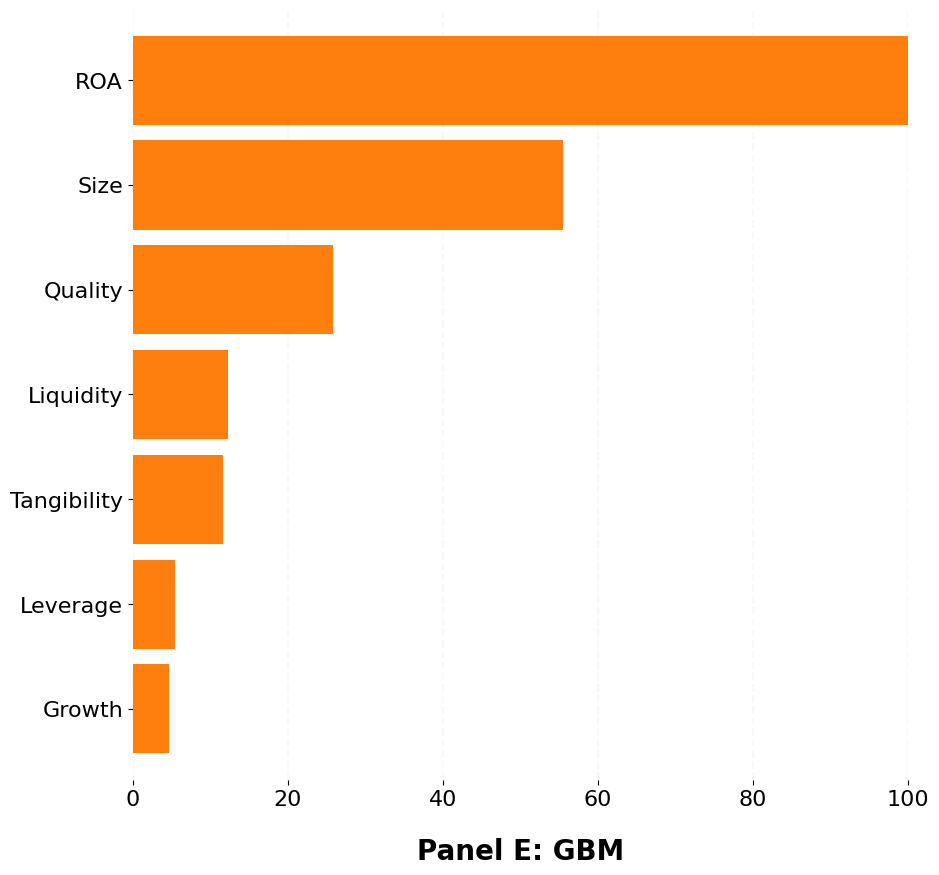

In [18]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

ax = variable_importance['Coefficient'].plot(kind='barh', figsize=(8, 10), color='#ff7f0e', zorder=2, width=0.85)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
# ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Define the new y-tick labels
new_yticklabels = variable_importance['Variable'].values

# Set the new y-tick labels
ax.set_yticklabels(new_yticklabels, fontsize=16)
ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)
ax.set_xlim([0, 100])

# Set x-axis label
ax.set_xlabel("Panel E: GBM", labelpad=20, weight='bold', size=20)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
plt.gcf().set_size_inches(10, 10)
plt.savefig(name + '_TQ_GBM.png')

In [19]:
from sklearn.neural_network import MLPRegressor

data["NNET"] = []
importances_over_time = []

model = MLPRegressor(hidden_layer_sizes=(64,), activation='relu', solver='lbfgs')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

sum_pred = 0
sum_avg = 0
for j in range(len(y_test)):
    sum_pred += (y_test.iloc[j] - y_pred[j])**2
    sum_avg += (y_test.iloc[j] - y_test.mean())**2

r_squared = (1 - sum_pred/sum_avg)
# Tính toán RMSE
rmse = sum_pred/len(X_test)

importances = abs(model.coefs_[0]).sum(axis=1)
importances = importances / max(importances) * 100
# importances_over_time.append(importances.round(4))

# print the model coefficients
data["NNET"].append(round(r_squared*100, 4))
data["NNET"].append(round(rmse, 7))
print('R-squared', r_squared)
print('RMSE', rmse)


importances = abs(model.coefs_[0]).sum(axis=1)

# create a dataframe of feature importances and sort by importance
variable_importance = pd.DataFrame({'Variable':  ['Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity'], 'Coefficient': importances})

# # Sort the DataFrame by absolute coefficient values
variable_importance = variable_importance.reindex(variable_importance['Coefficient'].abs().sort_values(ascending=True).index)

variable_importance['Coefficient'] = variable_importance['Coefficient'].abs()
variable_importance['Coefficient'] = round(variable_importance['Coefficient'] / variable_importance['Coefficient'].max() * 100, 2)

# print(importances_over_time)

R-squared 0.7084171771002171
RMSE 0.006064815576097327


/home/notta/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


/tmp/ipykernel_61237/116735549.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)


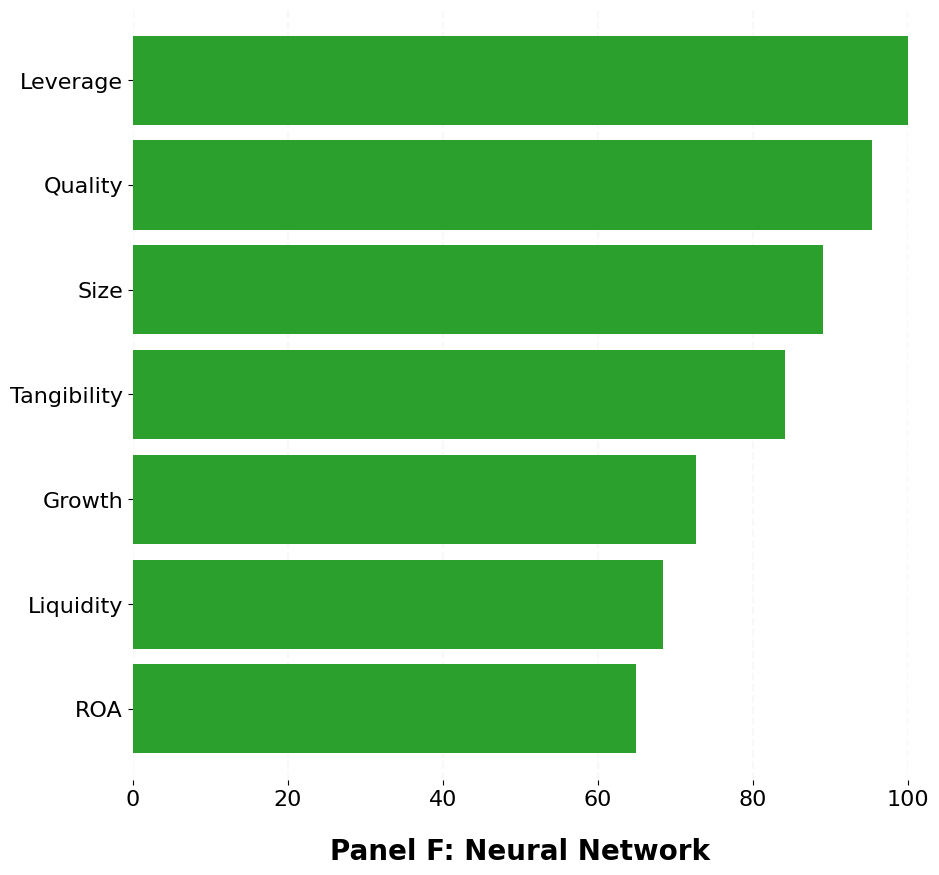

In [20]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

ax = variable_importance['Coefficient'].plot(kind='barh', figsize=(8, 10), color='#2ca02c', zorder=2, width=0.85)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
# ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Define the new y-tick labels
new_yticklabels = variable_importance['Variable'].values

# Set the new y-tick labels
ax.set_yticklabels(new_yticklabels, fontsize=16)
ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)
ax.set_xlim([0, 100])

# Set x-axis label
ax.set_xlabel("Panel F: Neural Network", labelpad=20, weight='bold', size=20)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
plt.gcf().set_size_inches(10, 10)
plt.savefig(name + '_TQ_NNET.png')

In [21]:
data

{'LM': [53.6166, 0.0096476],
 'Lasso': [53.4832, 0.0096753],
 'GAM': [76.3638, 0.0049162],
 'RF': [70.2009, 0.0061981],
 'GBM': [62.3053, 0.0078404],
 'NNET': [70.8417, 0.0060648]}